In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os 
import math
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from itertools import product

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading and describing data

df = pd.read_csv('aggregated_df_final01oct2021.csv')
df.describe(include= 'all')

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
count,1488,1488.000000,1488.000000,1488.000000,1488.000000,1469.000000,1.488000e+03,1474.000000,1463.000000,1.487000e+03,...,1488.000000,1.488000e+03,1488.000000,1488.000000,1488.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
unique,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,07-04-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14691.645046,15164.850573,14153.097305,14720.756935,14575.538125,3.210472e+07,53.151020,202.328875,1.010305e+08,...,36.472658,5.550080e+04,0.132895,0.352895,0.089066,0.230233,0.129457,0.348837,0.200000,0.091473
std,NaN,14494.863269,14967.645421,13928.197733,14515.367588,14243.105428,6.126127e+07,14.145612,1095.937162,5.868829e+08,...,16.146676,1.064818e+05,0.126408,0.083135,0.062895,0.421145,0.335836,0.476787,0.400155,0.288392
min,NaN,3188.010000,3268.953581,2817.000000,3189.020000,3500.468075,1.799570e+02,10.494657,-5072.114792,-2.322863e+09,...,18.409581,2.827780e+03,-0.367350,0.033333,-0.187500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6611.015810,6743.491250,6469.037551,6612.410083,6636.765491,5.872377e+05,43.797567,-184.030871,-3.131900e+07,...,24.683816,7.575363e+03,0.062371,0.296959,0.051407,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,8992.422500,9225.881250,8726.426583,9013.879800,9082.240621,3.147183e+06,51.963991,42.926289,1.159403e+05,...,27.773565,1.125902e+04,0.135434,0.341305,0.082179,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,12250.759375,13110.385000,11644.186875,12310.700625,12052.165770,2.643456e+07,62.773309,431.057389,2.695461e+08,...,52.146398,9.349144e+04,0.211749,0.404888,0.122015,0.000000,0.000000,1.000000,0.000000,0.000000


In [3]:
# Setting index and extracting relevant features for time series analysis

df = df.set_index('time')
df = df.iloc[:,0:4]

<AxesSubplot:xlabel='time'>

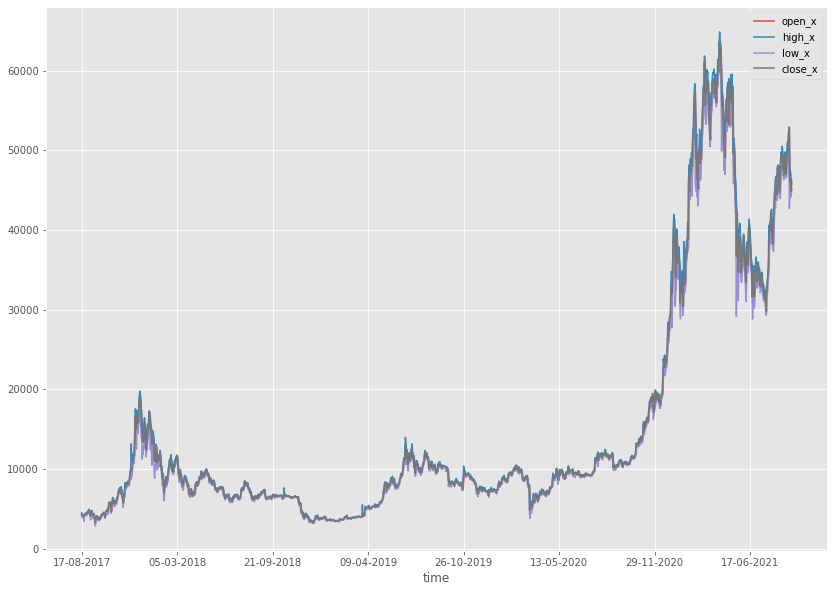

In [4]:
# Plotting movement of OHLC over the period 2017-2021
df.loc[:,df.columns].plot(figsize = (14,10))

In [5]:
# Converting index to datetime format
df.index = pd.to_datetime(df.index)

In [6]:
# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

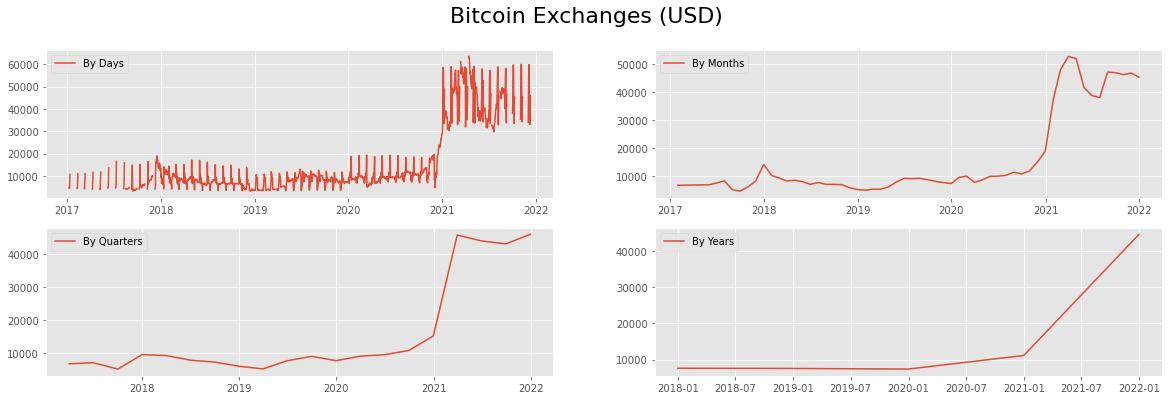

In [7]:
# Plotting subplots of OHLC by days, months, quarters and years
fig = plt.figure(figsize=[20,6])
plt.suptitle('Bitcoin Exchanges (USD)', fontsize=22)

plt.subplot(221)
plt.plot(df.close_x, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.show()

Dickey–Fuller test: p=0.944590


<Figure size 1440x720 with 0 Axes>

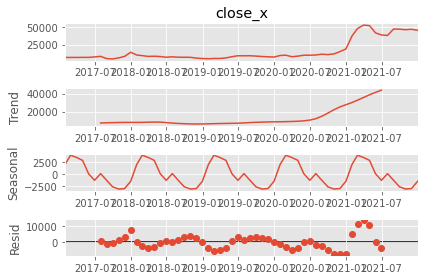

In [8]:
# Checking Stationarity 

plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(df_month.close_x).plot();
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()


From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

Dickey–Fuller test: p=0.741471


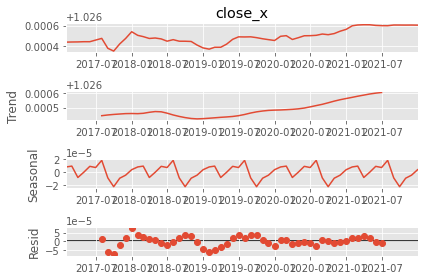

In [9]:
# Box-Cox Transformations

df_month['close_x'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
sm.tsa.seasonal_decompose(df_month.close_x).plot();

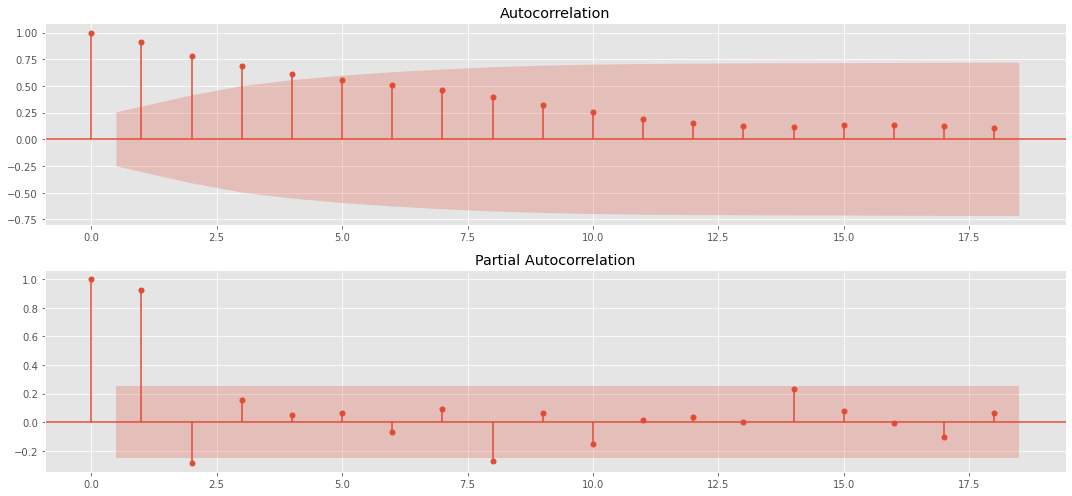

In [11]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.close_x, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.close_x, ax=ax)
plt.tight_layout()
plt.show()

In [12]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [13]:
# Model Selection

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [14]:
results

[[(0, 0, 0, 0), -833.8068687028097],
 [(0, 0, 0, 1), -836.1932423890894],
 [(0, 0, 1, 0), -834.1388625907144],
 [(0, 0, 1, 1), -829.3156574328275],
 [(0, 0, 2, 0), -832.5483059157001],
 [(0, 0, 2, 1), -828.3582799535912],
 [(0, 1, 0, 0), -847.4582541761943],
 [(0, 1, 0, 1), -845.4582541761943],
 [(0, 1, 1, 0), -844.3460724258937],
 [(0, 1, 1, 1), 61795.027205174905],
 [(0, 1, 2, 0), -838.9827323944651],
 [(0, 1, 2, 1), -836.0674514681333],
 [(0, 2, 0, 0), -843.2002049795786],
 [(0, 2, 0, 1), -841.2002049795786],
 [(0, 2, 1, 0), -838.4984152645618],
 [(0, 2, 1, 1), -837.0623786280402],
 [(0, 2, 2, 0), -830.11609380523],
 [(0, 2, 2, 1), -833.7444575310835],
 [(1, 0, 0, 0), -836.6222163115987],
 [(1, 0, 0, 1), -834.6222163115987],
 [(1, 0, 1, 0), -840.2818083840589],
 [(1, 0, 1, 1), -832.9661398042571],
 [(1, 0, 2, 0), -830.7612497463994],
 [(1, 0, 2, 1), -829.1302043716831],
 [(1, 1, 0, 0), -845.2407509503639],
 [(1, 1, 0, 1), -843.2407509503639],
 [(1, 1, 1, 0), -842.619161222778],
 [(1

In [15]:
# Best Models

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
6   (0, 1, 0, 0) -847.458254
7   (0, 1, 0, 1) -845.458254
24  (1, 1, 0, 0) -845.240751
36  (2, 0, 0, 0) -844.840253
8   (0, 1, 1, 0) -844.346072
                                      SARIMAX Results                                      
Dep. Variable:                             close_x   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 425.729
Date:                             Fri, 01 Oct 2021   AIC                           -847.458
Time:                                     22:59:04   BIC                           -843.758
Sample:                                 01-31-2017   HQIC                          -846.066
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

Dickey–Fuller test:: p=0.000001


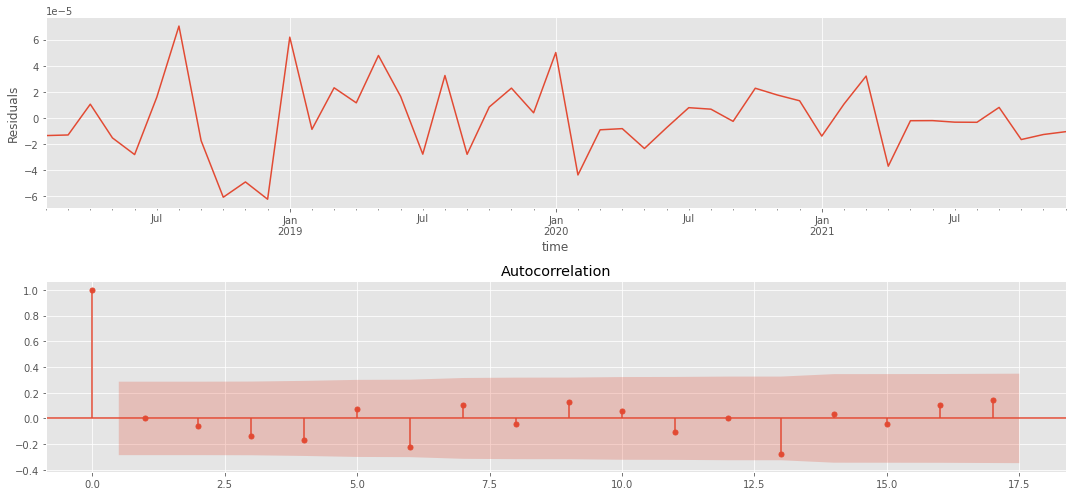

In [16]:
# STL-decomposition

plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [17]:
# Inverse Box-Cox Transformation Function

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

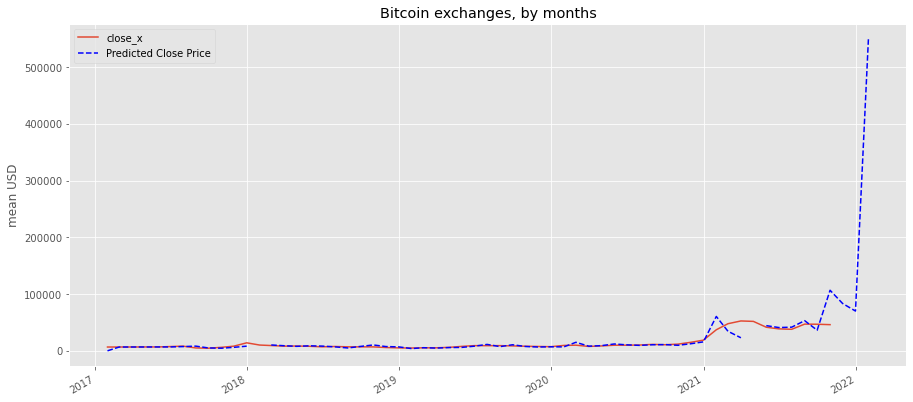

In [18]:
# Prediction

df_month2 = df_month[['close_x']]
df_month2.close_x = df_month2.close_x.apply(lambda x: invboxcox(x, lmbda))
date_list = [datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31), datetime(2022, 1, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.close_x.plot()
df_month2.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()


In [20]:
# Evaluation 

df_month3 = df_month2[['close_x','forecast']].dropna()
actual = df_month3['close_x']
pred = df_month3['forecast']
print("Mean Squared Error",mean_squared_error(actual,pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(actual,pred)))

Mean Squared Error 131699846.8540596
Root Mean Squared Error: 11476.055369945703
